# Dueling Double Deep Q-Network (DDDQN)
---
Implementation of the agent with OpenAI Gym's LunarLander-v2 environment. The code is based on materials from Udacity Deep Reinforcement Learning Nanodegree Program. 

### 1. Import the Necessary Packages

In [1]:
from collections import deque
import random
import gym
from pathlib import Path
import sys

import torch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import noisy_lander

%load_ext autoreload
%autoreload 2

#!python -m pip install pyvirtualdisplay
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(1400, 900))
#display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

sys.path.insert(0, Path().resolve().parent/"code")

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
real_env = gym.make('LunarLander-v2')
sim_env = gym.make('noisy-lander-v0', max_skew=1, seed=None)
real_env.seed(0)
sim_env.seed(10)
print('State shape: ', real_env.observation_space.shape)
print('Number of actions: ', sim_env.action_space.n)

Original MAIN_POWER_ENGINE:  13.0
Modified MAIN_POWER_ENGINE:  26.0
State shape:  (8,)
Number of actions:  4


### 3. Train the Agent 

Run the code cell below to train the agent from scratch. 

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

def train(gym_env, n_episodes=300, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = gym_env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = gym_env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_Dueling_DDQN.pth')
            break
    return scores

scores = train(gym_env=sim_env)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

ModuleNotFoundError: No module named 'dqn_agent'

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

total rewards:  [114.1224422093344, 142.2392273322934, 68.2261265075298, 246.7548415118936, 190.0367756620039, 79.75767958324948, 67.43326514256238, 143.47078095113739, 250.34952283899872, 178.3346331734937]
Average reward:  148.07252949124967


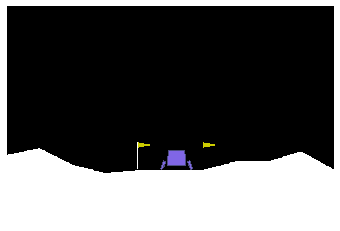

In [14]:
agent = Agent(state_size=8, action_size=4, seed=0)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Dueling_DDQN.pth', map_location=lambda storage, loc: storage))
total_rewards = []
for i in range(10):
    state = real_env.reset()
    img = plt.imshow(real_env.render(mode='rgb_array'))
    tot = 0
    for j in range(250):
        action = agent.act(state)
        img.set_data(real_env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = real_env.step(action)
        tot += reward
        if done:
            break 
    total_rewards.append(tot)
real_env.close()
print("total rewards: ", total_rewards)
print("Average reward: ", np.mean(total_rewards))

total rewards:  [99.35860401890186, 92.9480922325826, 55.010658223019675, 180.9682514409266, 280.1657820887674, 122.06634047477155, 179.740513549325, 145.85364093266253, 113.24908471396692, 51.26671060092224]
Average reward:  132.06276782758465


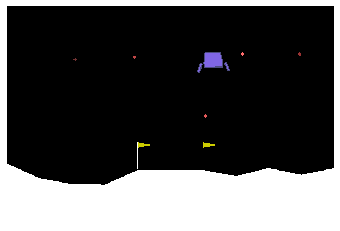

In [15]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Dueling_DDQN.pth', map_location=lambda storage, loc: storage))
total_rewards = []

for i in range(10):
    state = sim_env.reset()
    img = plt.imshow(sim_env.render(mode='rgb_array'))
    tot = 0
    for j in range(250):
        action = agent.act(state)
        img.set_data(sim_env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = sim_env.step(action)
        tot += reward
        if done:
            break 
    total_rewards.append(tot)
sim_env.close()
print("total rewards: ", total_rewards)
print("Average reward: ", np.mean(total_rewards))